# Keith Galli Scikit Learn tutorial
##  Building a model that automatically classifies text as either having a positive or negative sentiment
https://www.youtube.com/watch?v=M9Itm95JzL0&t=2690s

***

### Machine Learning Process

1. Find data to help answer question
2. Process Data
3. Build Model
4. Evaluate Model
5. Improve Model further

Scikit Learn helps simplifies the entire pipeline!
***

#### Two types on model

* Neural Network Models
* Traditional, Algorithmic Models - Scikit Learn best for this
***

### 1 Find Data

#### Amazon Data

#### Create Data class

In [4]:
#data class
import random
class Sentiment:
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'
    POSITIVE = 'POSITIVE'

class Review:
    def __init__(self,text,score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment() 
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #score 4 or 5
            return Sentiment.POSITIVE    

        #filtering
class ReviewContainer:
    def __init__(self,reviews):
        self.reviews= reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE,self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE,self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
       
        
        

#### Load Data

In [5]:
#importing data
import json

file_name = 'F:/Desktop/HDip/Machine_Learning/Data/Books_small_10000.json'

reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'],review['overall']))
        
reviews[5].sentiment

'POSITIVE'

### Prep Data

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [7]:
from sklearn.model_selection import train_test_split

training,test = train_test_split(reviews,test_size=0.33,random_state=42)

train_container = ReviewContainer(training)

test_container = ReviewContainer(test)





* x is the text
* y is the category i.e. sentiment

In [8]:
train_container.evenly_distribute()

train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

436
436


#### Bag of word vectoriser

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #<-weighs words
#weights all words the same
#this book is great!
#this book was so bad!


vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

### Classification

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

google linear svm mit


#### Linear SVM

In [63]:
from sklearn import svm

clf_svm = svm.SVC(kernel = 'linear')

clf_svm.fit(train_x_vectors,train_y)

clf_svm.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

#### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors.toarray(),train_y)

clf_dec.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

#### Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

clf_nb = DecisionTreeClassifier()
clf_nb.fit(train_x_vectors.toarray(),train_y)

clf_nb.predict(test_x_vectors[0])


array(['NEGATIVE'], dtype='<U8')

#### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors,train_y)

clf_log.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

### Evaluation

In [67]:
# mean accuracy
print(clf_svm.score(test_x_vectors,test_y))
print(clf_dec.score(test_x_vectors,test_y))
print(clf_nb.score(test_x_vectors,test_y))
print(clf_log.score(test_x_vectors,test_y))

0.8076923076923077
0.65625
0.6129807692307693
0.8052884615384616


#### F1 scores

In [68]:
#f1 scores
from sklearn.metrics import f1_score

#linear svm f scores
f1_score(test_y,clf_svm.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])

array([0.80582524, 0.80952381])

In [69]:
#decision tree f scores
f1_score(test_y,clf_dec.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])

array([0.65375303, 0.65871122])

In [70]:
#logisitc f score
f1_score(test_y,clf_log.predict(test_x_vectors),average=None,labels=[Sentiment.POSITIVE,Sentiment.NEGATIVE])

array([0.80291971, 0.80760095])

In [71]:
train_y.count(Sentiment.NEGATIVE)

436

#### Testing model

In [96]:
test_set = ['bad','great','great','not great']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE'], dtype='<U8')

#### Tuning our model (Grid Search)

* https://scikit-learn.org/stable/modules/grid_search.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [81]:
from sklearn.model_selection import GridSearchCV

#grid search allows search alot of parameters
parameters = {'kernel':('linear','rbf'),'C':(1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(train_x_vectors,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [83]:
print(clf.score(test_x_vectors,test_y))


0.8197115384615384


In [ ]:
#stip out puncutation marks

#### Saving the model

In [86]:
import pickle

with open('F:/Desktop/HDip/Machine_Learning/models/sentiment_classifier.pkl','wb') as f:
    pickle.dump(clf,f)

#### Load Model

In [88]:
with open('F:/Desktop/HDip/Machine_Learning/models/sentiment_classifier.pkl','rb') as f:
    loaded_clf = pickle.load(f)

In [93]:
print(test_x[11])

loaded_clf.predict(test_x_vectors[11])

I gave this book a five star because I think out of all of the three football stars, Sam is my favorite.  He has had a lot of women problems and Dellina is just the perfect match for him.  I liked the storyline of Sam's parents.  It sort of made it funny that this big football player has a mom who tells him what to try and is always keeping an eye on him (whether it is checking his closets, his dresser or even telling him what kind of condoms to use.I think that anyone who has read all the Fool's Gold books would enjoy this one as much.  I hope that Susan will write a book about Kenny and Bailey.  I think Chloe will have a big impact on him.


array(['POSITIVE'], dtype='<U8')

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

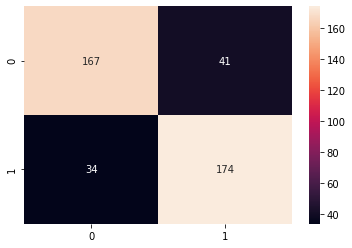

In [105]:
labels = [Sentiment.NEGATIVE,Sentiment.POSITIVE]
cm = confusion_matrix(test_y,loaded_clf.predict(test_x_vectors),labels=labels)
df = pd.DataFrame(cm)#,index=reverse(labels),columns=labels)

sns.heatmap(df,annot=True,fmt='d');